<a href="https://colab.research.google.com/github/annadorer/PIS2/blob/main/PIS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA


from sklearn.ensemble import ExtraTreesClassifier

# data import 

In [153]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
data.head(3)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [154]:
names = ["id","RI","Na", "Mg", "Al", "Si", "K", "Ca","Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [155]:
data['Class'].replace (
    {
        1:"building_float",
        2:"building_non_float",
        3:"vehicle_float",
        4:"vehicle_non_float",
        5:"containers",
        6:"tableware",
        7:"headlamps"
    }, inplace = True
)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_float
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_float
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_float


In [156]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index,col] = np.nan
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.51761,13.89,3.60,1.36,72.73,NaN,7.83,0.0,0.00,building_float
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,NaN
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_float
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,NaN,building_float
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_float


In [157]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      200 non-null    float64
 1   Na      194 non-null    float64
 2   Mg      202 non-null    float64
 3   Al      194 non-null    float64
 4   Si      196 non-null    float64
 5   K       202 non-null    float64
 6   Ca      198 non-null    float64
 7   Ba      194 non-null    float64
 8   Fe      196 non-null    float64
 9   Class   200 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [158]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,200.000000,194.000000,202.000000,194.000000,196.000000,202.000000,198.000000,194.000000,196.000000
mean,1.518309,13.414845,2.629950,1.461546,72.643776,0.504604,8.899646,0.188866,0.053673
std,0.003086,0.839283,1.464944,0.499862,0.799806,0.667396,1.354273,0.518193,0.092380
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516460,12.892500,1.835000,1.190000,72.242500,0.130000,8.240000,0.000000,0.000000
50%,1.517650,13.300000,3.480000,1.390000,72.800000,0.560000,8.595000,0.000000,0.000000
75%,1.519095,13.877500,3.600000,1.647500,73.100000,0.610000,9.137500,0.000000,0.092500
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [159]:
display(data['Class'].describe())
print ("*****************************")
display(data['Class'].value_counts())

count                    200
unique                     6
top       building_non_float
freq                      68
Name: Class, dtype: object

*****************************


building_non_float    68
building_float        65
headlamps             29
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [160]:
for col in data.columns:

  missing_values_counts = data[col].isna().sum()
  percentage = 100 * data[col].isna().sum()/len(data[col])

  print("Column",col,"contains",missing_values_counts,"NULL values (",percentage,"%).")

Column RI contains 13 NULL values ( 6.103286384976526 %).
Column Na contains 19 NULL values ( 8.92018779342723 %).
Column Mg contains 11 NULL values ( 5.164319248826291 %).
Column Al contains 19 NULL values ( 8.92018779342723 %).
Column Si contains 17 NULL values ( 7.981220657276995 %).
Column K contains 11 NULL values ( 5.164319248826291 %).
Column Ca contains 15 NULL values ( 7.042253521126761 %).
Column Ba contains 19 NULL values ( 8.92018779342723 %).
Column Fe contains 17 NULL values ( 7.981220657276995 %).
Column Class contains 13 NULL values ( 6.103286384976526 %).


#data vizualization

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      200 non-null    float64
 1   Na      194 non-null    float64
 2   Mg      202 non-null    float64
 3   Al      194 non-null    float64
 4   Si      196 non-null    float64
 5   K       202 non-null    float64
 6   Ca      198 non-null    float64
 7   Ba      194 non-null    float64
 8   Fe      196 non-null    float64
 9   Class   200 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [162]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,200.000000,194.000000,202.000000,194.000000,196.000000,202.000000,198.000000,194.000000,196.000000
mean,1.518309,13.414845,2.629950,1.461546,72.643776,0.504604,8.899646,0.188866,0.053673
std,0.003086,0.839283,1.464944,0.499862,0.799806,0.667396,1.354273,0.518193,0.092380
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516460,12.892500,1.835000,1.190000,72.242500,0.130000,8.240000,0.000000,0.000000
50%,1.517650,13.300000,3.480000,1.390000,72.800000,0.560000,8.595000,0.000000,0.000000
75%,1.519095,13.877500,3.600000,1.647500,73.100000,0.610000,9.137500,0.000000,0.092500
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [163]:
display(data['Class'].describe())
print("===================================")
display(data['Class'].value_counts())

count                    200
unique                     6
top       building_non_float
freq                      68
Name: Class, dtype: object

building_non_float    68
building_float        65
headlamps             29
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [164]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage=100*data[col].isna().sum()/len(data[col])
  print("column",col,"contains",missing_values_counts,
        "NULL values(", percentage ,"%).")

column RI contains 13 NULL values( 6.103286384976526 %).
column Na contains 19 NULL values( 8.92018779342723 %).
column Mg contains 11 NULL values( 5.164319248826291 %).
column Al contains 19 NULL values( 8.92018779342723 %).
column Si contains 17 NULL values( 7.981220657276995 %).
column K contains 11 NULL values( 5.164319248826291 %).
column Ca contains 15 NULL values( 7.042253521126761 %).
column Ba contains 19 NULL values( 8.92018779342723 %).
column Fe contains 17 NULL values( 7.981220657276995 %).
column Class contains 13 NULL values( 6.103286384976526 %).


# histograms

In [165]:
col = 'Al'

<function matplotlib.pyplot.show>

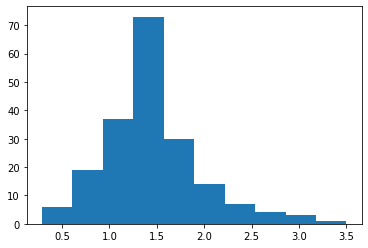

In [166]:
plt.hist(data[col])
plt.show

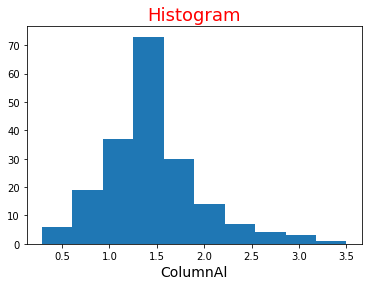

In [167]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col])
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)

#create everthing
plt.show()

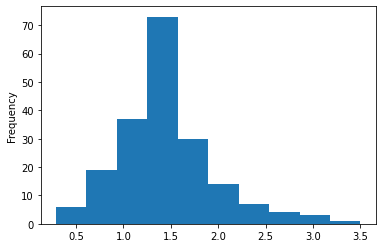

In [168]:
data[col].plot(kind='hist')
plt.show()

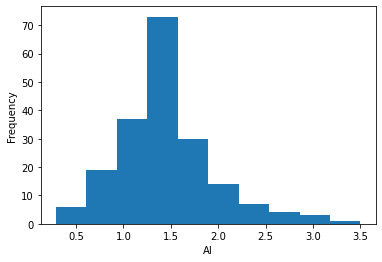

In [169]:
ax = data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

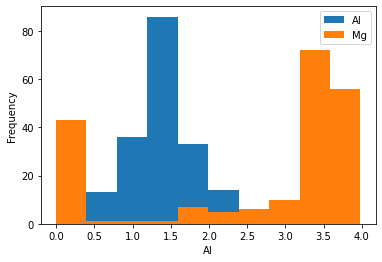

In [170]:
ax = data[['Al', 'Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

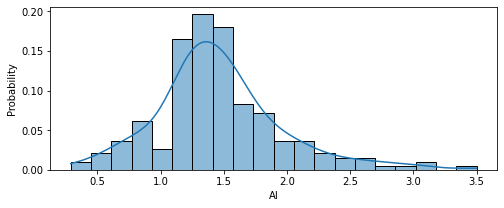

In [171]:
plt.figure(figsize = (8,3))
ax = sns.histplot(data = data, x = col, bins = 20, kde = True, stat = 'probability')
plt.show()

# bar plot

In [172]:
col = 'Class'

In [173]:
df1 = data[col].value_counts()
df1

building_non_float    68
building_float        65
headlamps             29
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [174]:
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [175]:
df1.values

array([68, 65, 29, 17, 12,  9])

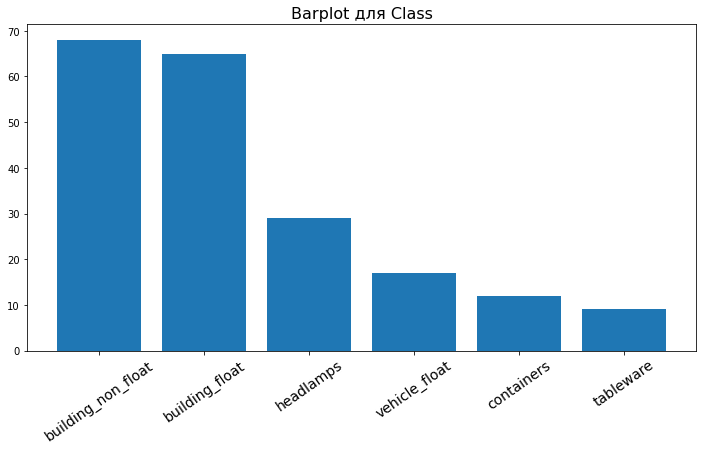

In [176]:
col = 'Class'

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(data[col].value_counts().index.values, 
       data[col].value_counts().values)

ax.set_xlabel(None, fontsize = 16)
ax.set_title('Barplot для '+str(col), fontsize = 16)
ax.tick_params(axis='x', which ='major', labelsize = 14, rotation = 35)

plt.show()

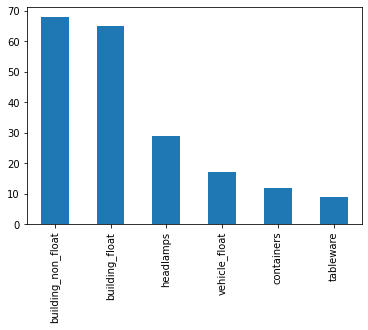

In [177]:
data[col].value_counts().plot(kind = 'bar')
plt.show()

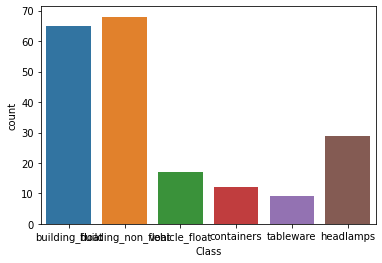

In [178]:
sns.countplot(data = data, x = "Class")
plt.show()

# boxplot

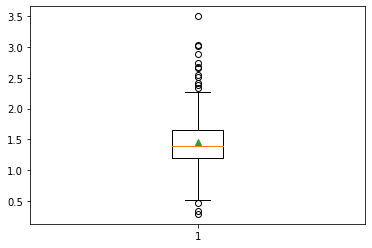

In [179]:
col='Al'

fig, ax = plt.subplots()

ax.boxplot(data[col][~np.isnan(data[col])], showmeans = True)

plt.show()

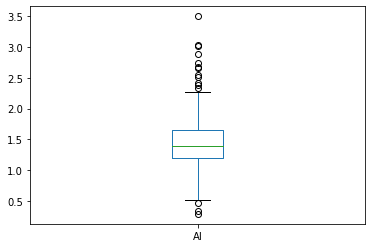

In [180]:
data[col].plot(kind = 'box')
plt.show()

<function matplotlib.pyplot.show>

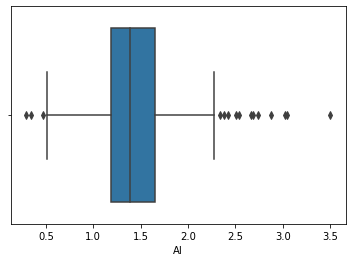

In [181]:
sns.boxplot(data = data, x = col)
plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


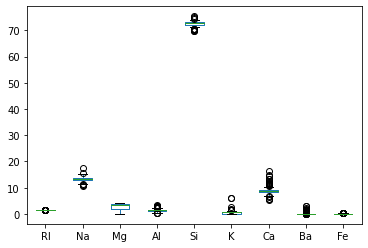

In [182]:
data.plot(kind = 'box')
plt.show()

In [183]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [184]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [185]:
data.columns.values != 'Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [186]:
data.columns.values[data.columns.values != 'Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

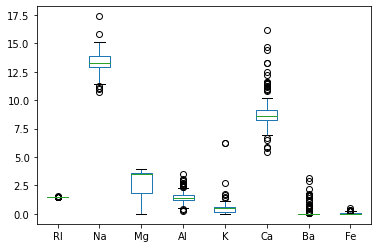

In [187]:
data[data.columns.values[data.columns.values!='Si']].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

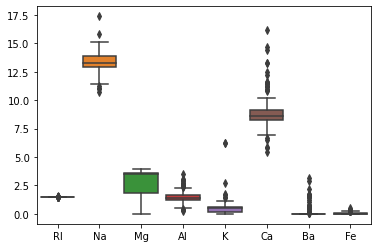

In [188]:
sns.boxplot(data = data[data.columns.values[data.columns.values!='Si']])
plt.show

# skaler

In [189]:
scaler1=prepro.MinMaxScaler()
datascaler1=scaler1.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler1=pd.DataFrame(datascaler1, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


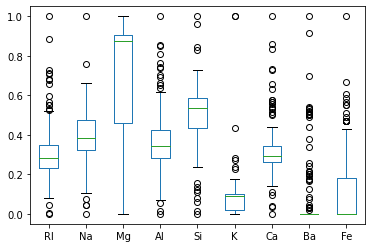

In [190]:
datascaler1.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show>

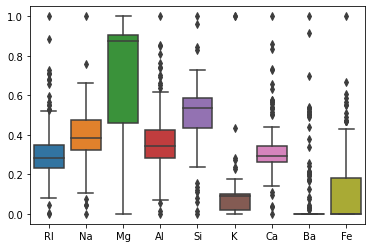

In [191]:
sns.boxplot(data=datascaler1)
plt.show

In [192]:
scaler2 = prepro.StandardScaler()
data2 = scaler1.fit_transform(data[data.columns.values[data.columns.values!='Class']])
data2 = pd.DataFrame(data2, columns=data.columns.values[data.columns.values!='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


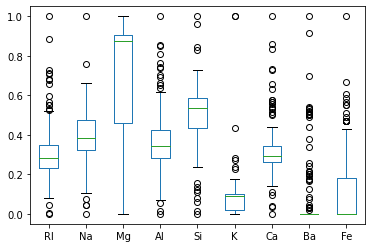

In [193]:
data2.plot(kind='box')
plt.show()

# pair plot

In [194]:
col1 = 'Mg'
col2 = 'Fe'

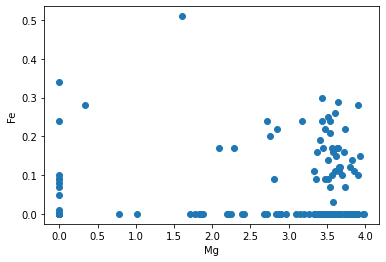

In [195]:
fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

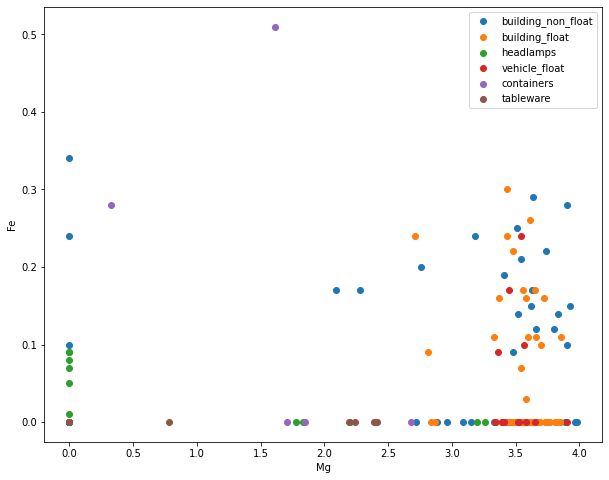

In [196]:
fig, ax = plt.subplots(figsize=(10,8))

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


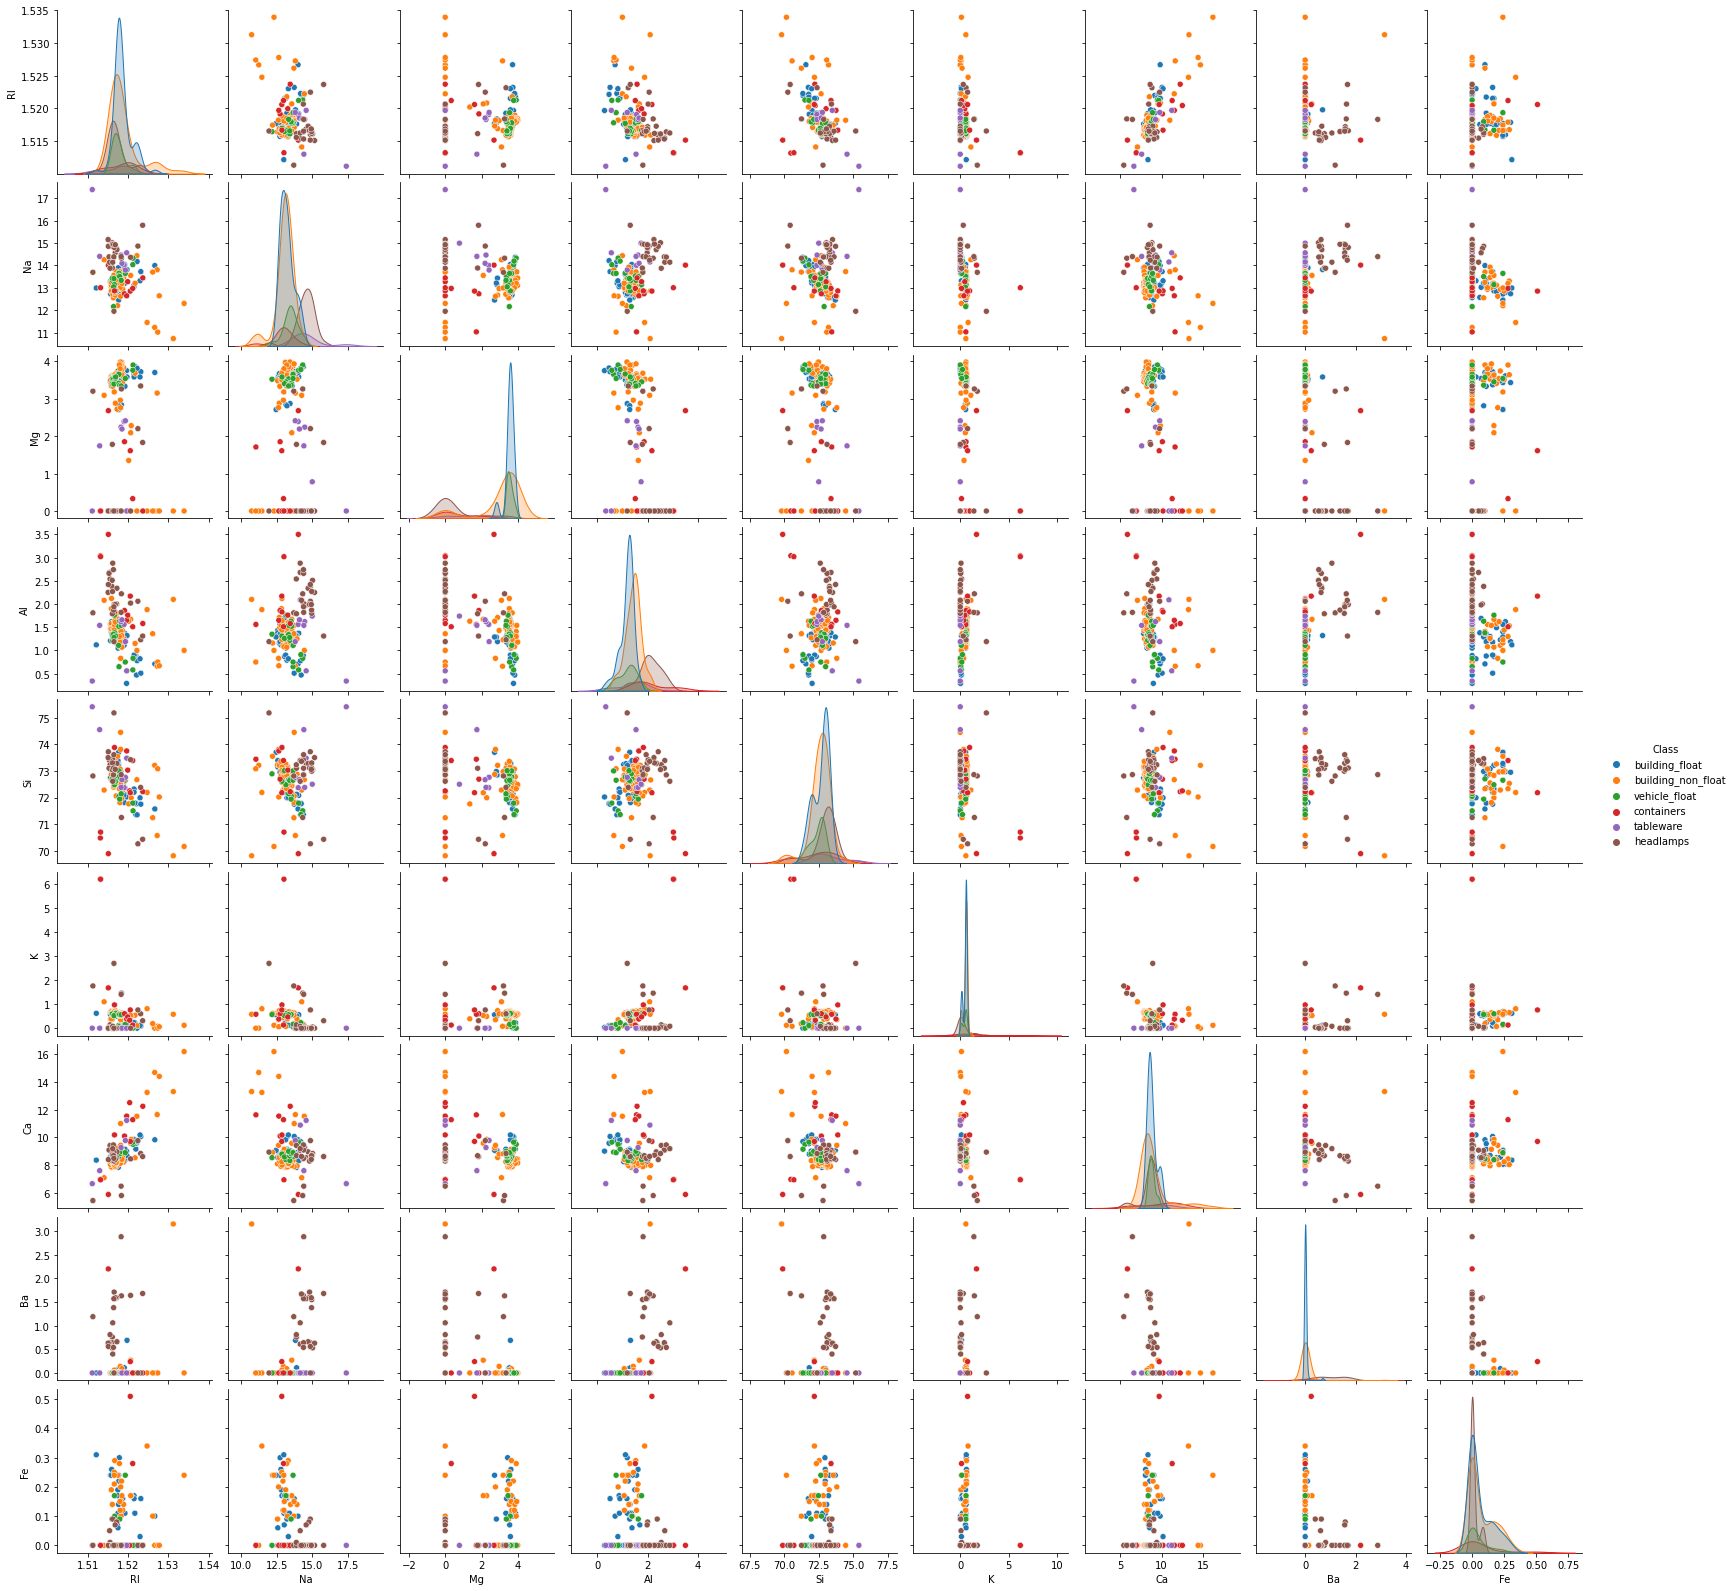

In [197]:
sns.pairplot(data=data, hue='Class')
plt.show()

#Задание 3

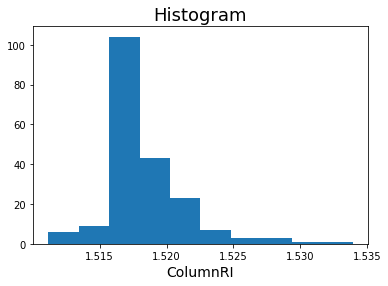

In [198]:
data_x = "RI" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe","Class"]
col1 = "RI"
col2 = "Na"
col3 = "Mg"
col4 = "Al"
col5 = "Si"
col6 = "K"
col7 = "Ca"
col8 = "Ba"
col9 = "Fe"
col10 = "Class"

if data_x == "RI":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col1])
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Na":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col2])
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Mg":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col3])
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Al":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col4])
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Si":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col5])
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "K":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col6])
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Ca":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col7])
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Ba":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col8])
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Fe":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col9])
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Histogram",color='black',fontsize=18)
  plt.show()
elif data_x == "Class":
  fig,ax =plt.subplots(figsize=(12,6))
  ax.bar(data[col10].value_counts().index.values,data[col10].value_counts().values)
  ax.set_xlabel(None,fontsize=16)
  ax.set_title('Barplot для '+str(col10),fontsize=16)
  ax.tick_params(axis='x',which='major',labelsize=14,rotation=35)
  plt.show()

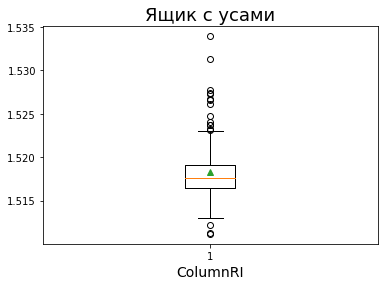

In [199]:
data_y = "RI" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
col1 = "RI"
col2 = "Na"
col3 = "Mg"
col4 = "Al"
col5 = "Si"
col6 = "K"
col7 = "Ca"
col8 = "Ba"
col9 = "Fe"

if data_y == "RI":
  fig, ax=plt.subplots()
  ax.boxplot(data[col1][~np.isnan(data[col1])],showmeans=True)
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Na":
  fig, ax=plt.subplots()
  ax.boxplot(data[col2][~np.isnan(data[col2])],showmeans=True)
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Mg":
  fig, ax=plt.subplots()
  ax.boxplot(data[col3][~np.isnan(data[col3])],showmeans=True)
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Al":
  fig, ax=plt.subplots()
  ax.boxplot(data[col4][~np.isnan(data[col4])],showmeans=True)
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Si":
  fig, ax=plt.subplots()
  ax.boxplot(data[col5][~np.isnan(data[col5])],showmeans=True)
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "K":
  fig, ax=plt.subplots()
  ax.boxplot(data[col6][~np.isnan(data[col6])],showmeans=True)
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Ca":
  fig, ax=plt.subplots()
  ax.boxplot(data[col7][~np.isnan(data[col7])],showmeans=True)
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Ba":
  fig, ax=plt.subplots()
  ax.boxplot(data[col8][~np.isnan(data[col8])],showmeans=True)
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()
elif data_y == "Fe":
  fig, ax=plt.subplots()
  ax.boxplot(data[col9][~np.isnan(data[col9])],showmeans=True)
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Ящик с усами",color='black',fontsize=18)
  plt.show()

<function matplotlib.pyplot.show>

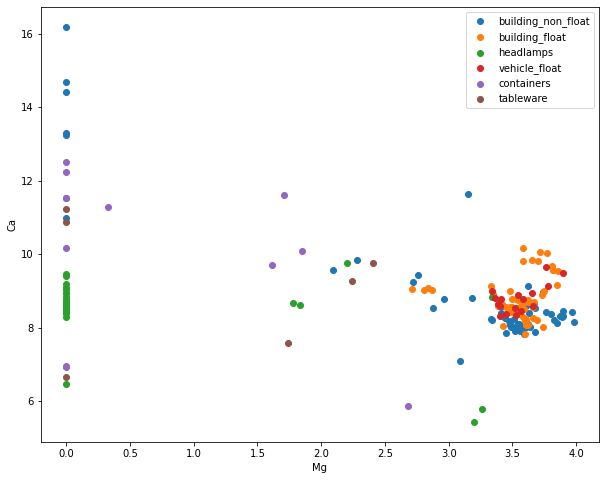

In [200]:
data_z1 = "Mg" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
data_z2 = "Ca" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]

col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"

fig, ax = plt.subplots(figsize=(10,8))

for glassType in data['Class'].value_counts().index.values: 
  ax.scatter(data[data_z1][data['Class']==glassType],data[data_z2] [data['Class']==glassType],label=glassType)

ax.set_xlabel(data_z1)
ax.set_ylabel(data_z2)
ax.legend()
plt.show

#NaN

In [201]:
data.mean()

RI     1.518309
Na    13.414845
Mg     2.629950
Al     1.461546
Si    72.643776
K      0.504604
Ca     8.899646
Ba     0.188866
Fe     0.053673
dtype: float64

In [202]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Class   200 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [203]:
data_fillna_mean['Class'].value_counts().index[0]

'building_non_float'

In [204]:
data['Class'].mode()

0    building_non_float
dtype: object

In [205]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Class   213 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [206]:
display(data_fillna_mean)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.517610,13.89,3.60,1.36,72.73,0.504604,7.83,0.00,0.000000,building_float
1,1.516180,13.53,3.55,1.54,72.99,0.390000,7.78,0.00,0.000000,building_non_float
2,1.517660,13.21,3.69,1.29,72.61,0.570000,8.22,0.00,0.000000,building_float
3,1.517420,13.27,3.62,1.24,73.08,0.550000,8.07,0.00,0.053673,building_float
4,1.515960,12.79,3.61,1.62,72.97,0.640000,8.07,0.00,0.260000,building_float
...,...,...,...,...,...,...,...,...,...,...
208,1.516230,14.14,0.00,2.88,72.61,0.080000,9.18,1.06,0.000000,headlamps
209,1.516850,14.92,0.00,1.99,73.06,0.000000,8.40,1.59,0.000000,headlamps
210,1.520650,14.36,0.00,2.02,73.42,0.000000,8.44,1.64,0.053673,headlamps
211,1.516510,14.38,0.00,1.94,73.61,0.000000,8.48,1.57,0.000000,headlamps


#PCA

In [207]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [208]:
pca.explained_variance_ratio_*100

array([4.51857936e+01, 2.67310807e+01, 1.11589468e+01, 1.06642780e+01,
       3.40398787e+00, 1.68979313e+00, 1.04076159e+00, 1.25331508e-01,
       2.67766159e-05])

<function matplotlib.pyplot.show>

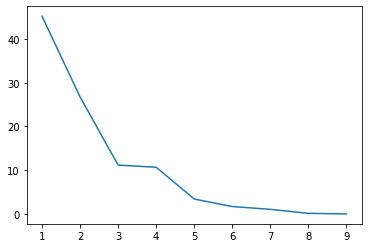

In [209]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show

In [210]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

In [211]:
dataPca= pd.DataFrame(rez)
dataPca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.402087,-0.453396,0.061349,-0.390123,-0.191952,-0.031127,-0.01839,-0.040984,-0.001141
1,-1.382498,-0.451375,-0.308352,-0.204270,0.030675,-0.187791,0.02593,-0.048465,-0.000247
2,-1.289249,0.152522,-0.056523,0.057505,0.009568,0.029619,0.06768,-0.059219,0.000043


In [212]:
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.402087,-0.453396,0.061349,-0.390123,-0.191952,-0.031127,-0.018390,-0.040984,-0.001141
1,-1.382498,-0.451375,-0.308352,-0.204270,0.030675,-0.187791,0.025930,-0.048465,-0.000247
2,-1.289249,0.152522,-0.056523,0.057505,0.009568,0.029619,0.067680,-0.059219,0.000043
3,-1.313826,-0.085436,-0.468411,-0.034463,-0.058206,0.087940,-0.037883,-0.002616,-0.000787
4,-1.305863,0.017796,-0.491859,0.447554,0.198259,-0.203461,0.027539,0.195101,0.000192


In [213]:
dataPca['Class']=data_fillna_mean['Class'].copy()

<function matplotlib.pyplot.show>

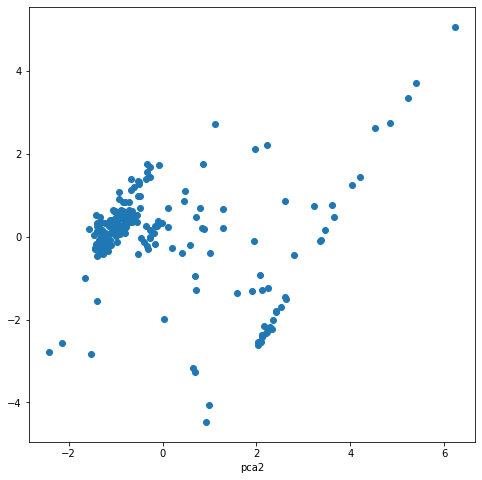

In [214]:
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

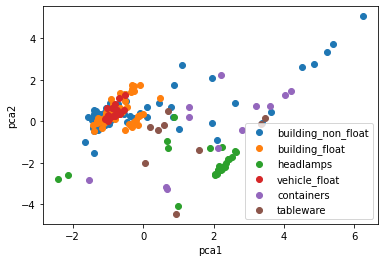

In [215]:
col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

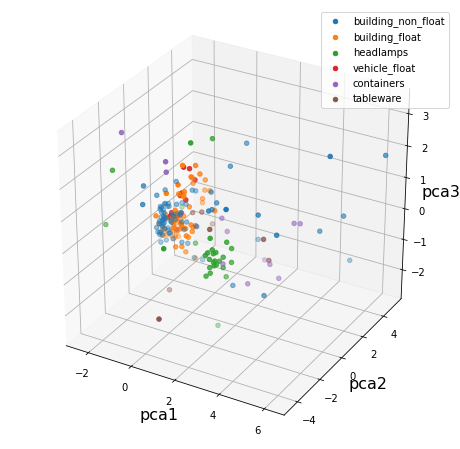

In [216]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

#Корреляция

In [217]:
corr=data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.210618,-0.132670,-0.369889,-0.519438,-0.285086,0.748451,0.020346,0.079472
Na,-0.210618,1.000000,-0.255681,0.178866,-0.049480,-0.221617,-0.272252,0.310708,-0.229206
Mg,-0.132670,-0.255681,1.000000,-0.480809,-0.169378,-0.009689,-0.382808,-0.489843,0.066553
Al,-0.369889,0.178866,-0.480809,1.000000,-0.012376,0.341196,-0.219883,0.480651,-0.111774
Si,-0.519438,-0.049480,-0.169378,-0.012376,1.000000,-0.202994,-0.202156,-0.112914,0.002228
K,-0.285086,-0.221617,-0.009689,0.341196,-0.202994,1.000000,-0.315583,0.009277,-0.008823
Ca,0.748451,-0.272252,-0.382808,-0.219883,-0.202156,-0.315583,1.000000,-0.096491,0.116730
Ba,0.020346,0.310708,-0.489843,0.480651,-0.112914,0.009277,-0.096491,1.000000,-0.120551
Fe,0.079472,-0.229206,0.066553,-0.111774,0.002228,-0.008823,0.116730,-0.120551,1.000000


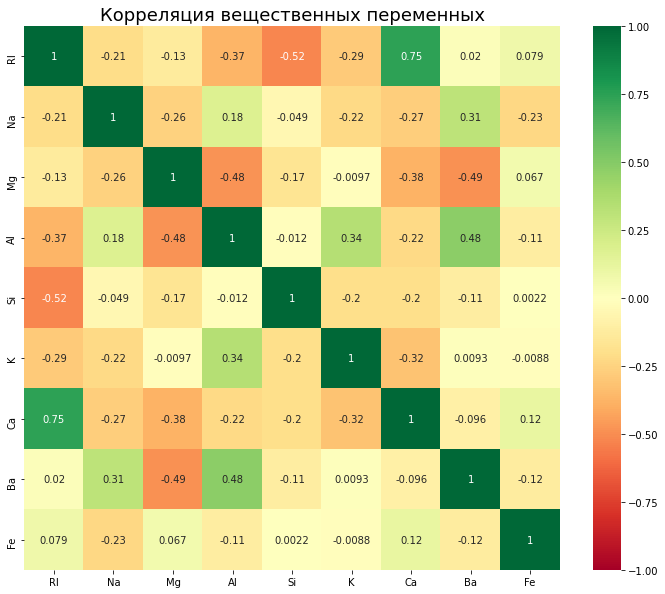

In [218]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

#Задание 4

In [219]:
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.517610,13.89,3.60,1.36,72.73,0.504604,7.83,0.00,0.000000,building_float
1,1.516180,13.53,3.55,1.54,72.99,0.390000,7.78,0.00,0.000000,NaN
2,1.517660,13.21,3.69,1.29,72.61,0.570000,8.22,0.00,0.000000,building_float
3,1.517420,13.27,3.62,1.24,73.08,0.550000,8.07,0.00,0.053673,building_float
4,1.515960,12.79,3.61,1.62,72.97,0.640000,8.07,0.00,0.260000,building_float
...,...,...,...,...,...,...,...,...,...,...
208,1.516230,14.14,0.00,2.88,72.61,0.080000,9.18,1.06,0.000000,headlamps
209,1.516850,14.92,0.00,1.99,73.06,0.000000,8.40,1.59,0.000000,headlamps
210,1.520650,14.36,0.00,2.02,73.42,0.000000,8.44,1.64,0.053673,headlamps
211,1.516510,14.38,0.00,1.94,73.61,0.000000,8.48,1.57,0.000000,headlamps


0

<function matplotlib.pyplot.show>

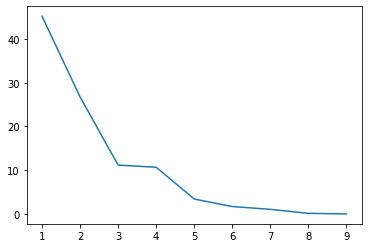

In [220]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show

<function matplotlib.pyplot.show>

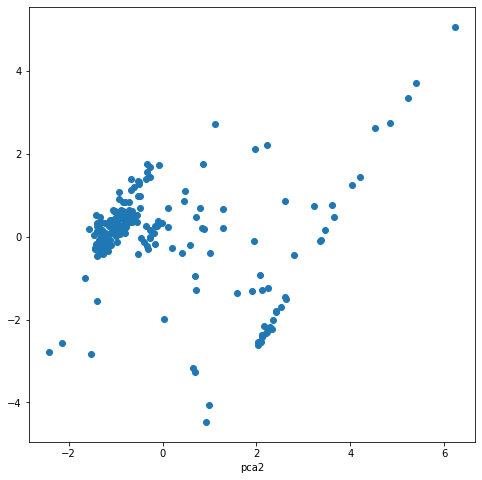

In [221]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

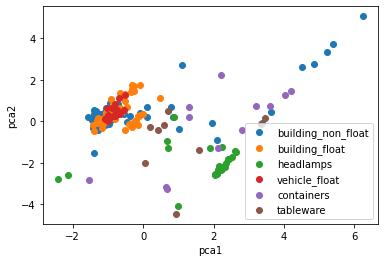

In [222]:
col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

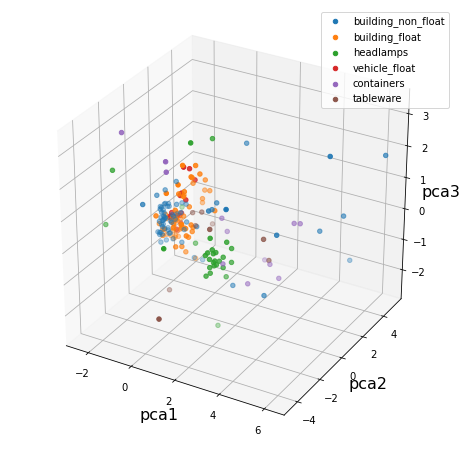

In [223]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

In [224]:
corr = data_fillna_mean.corr()

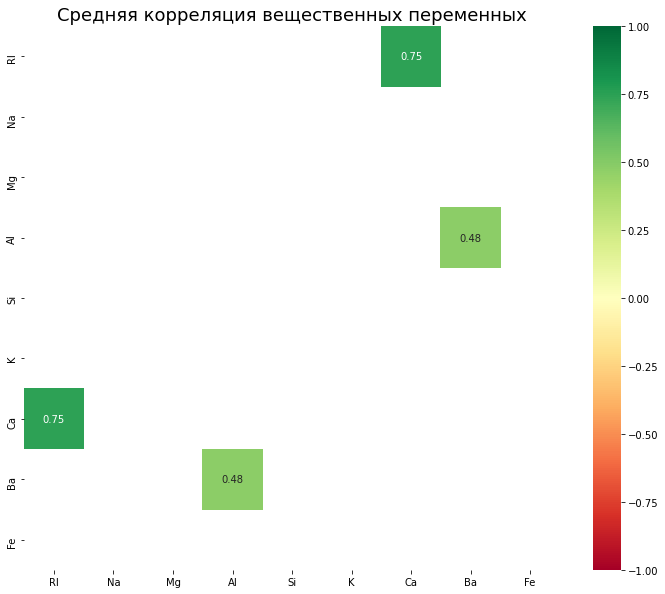

In [225]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()

#Cильная корреляция( -1; -0.75) и ( 0.75 ; 1) 
#Средняя корреляция ( -0.75; -0.45) и (0.45: 0,75) 
#Слабая корреляция ( -0.45 ; -0.25) и ( 0.25;0.45)

plt.figure(figsize=(12,10))

ax = sns.heatmap(corr[((corr>=-0.45) & (corr<=-0.75)) |((corr>=0.45)&(corr<=0.75))],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Средняя корреляция вещественных переменных',fontsize=18)

plt.show()

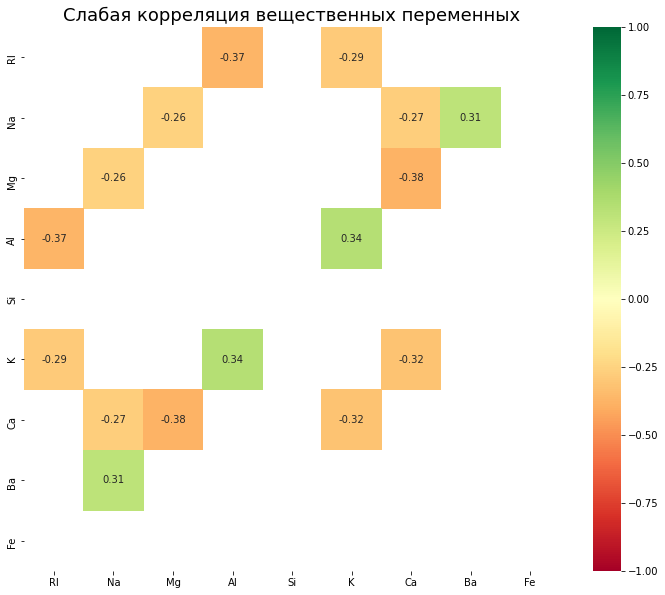

In [226]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[((corr>=-0.45)&(corr<=-0.25)) |((corr>=0.25)&(corr<=0.45))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Слабая корреляция вещественных переменных', fontsize=18)

plt.show()

#feature importance

In [239]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].mode()[0], inplace=True)

In [240]:
data_fillna_mean['Class'].mode()[0]

'building_non_float'

In [241]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Class   213 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [242]:
forest = ExtraTreesClassifier(n_estimators=100)

In [243]:
#forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [244]:
data_fillna_mean['Class'].isna().sum()

0

In [245]:
importances= forest.feature_importances_
importances

array([0.13725893, 0.09770073, 0.18120725, 0.13979066, 0.09176429,
       0.10342437, 0.11658037, 0.07955958, 0.05271383])

In [246]:
np.sort(importances)[::-1]

array([0.18120725, 0.13979066, 0.13725893, 0.11658037, 0.10342437,
       0.09770073, 0.09176429, 0.07955958, 0.05271383])

In [247]:
indices=np.argsort(importances)[::-1]
indices

array([2, 3, 0, 6, 5, 1, 4, 7, 8])

In [248]:
# print the feature ranking
print("Featire ranking")

for f in range (9):
  print("%d. feature %s (%f)" % ( f+1, data_fillna_mean.columns.values[indices[f]],
                importances[indices[f]]))

Featire ranking
1. feature Mg (0.181207)
2. feature Al (0.139791)
3. feature RI (0.137259)
4. feature Ca (0.116580)
5. feature K (0.103424)
6. feature Na (0.097701)
7. feature Si (0.091764)
8. feature Ba (0.079560)
9. feature Fe (0.052714)


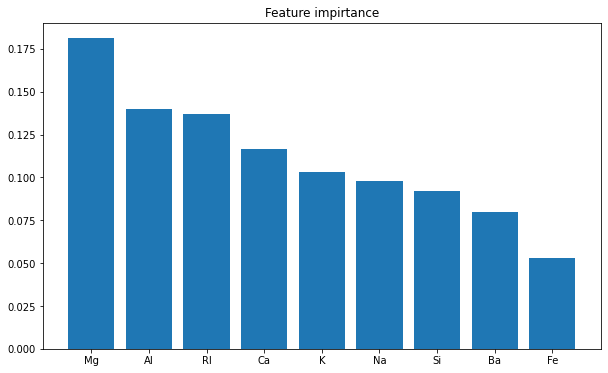

In [249]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices])
plt.show()

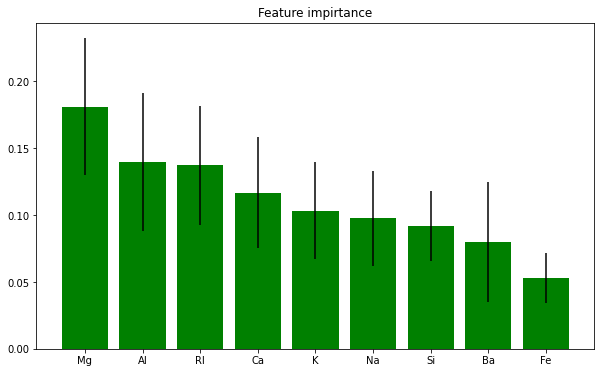

In [250]:
std=np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)


fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices],
       color='g', yerr=std[indices],align="center")
plt.show()